In [142]:
# Import packages
import numpy as np
import pandas as pd

# Use Subpackages
from matplotlib import pyplot as plt
from numpy import random
from sklearn.preprocessing import scale,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

In [155]:
# Dataset and choose x and y
iris=datasets.load_iris()
data=iris.data
x=data[:,0]
y=data[:,3]

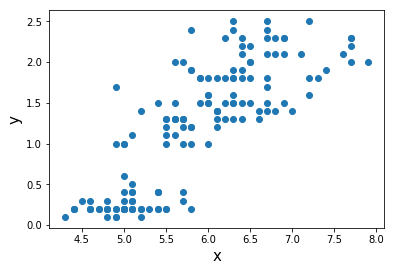

In [156]:
# Plot data as x and y
plt.scatter(x,y)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [157]:
# Add prolynomial features to x_train
# For Using dataset features use degree=1 in polynomialfeatures and if you want more increase degree and check result
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x.reshape(-1,1))

In [158]:
# Normalize x because features will have different ranges
x=np.hstack(((x[:,0].reshape(-1,1)),scale(x[:,1:])))

In [159]:
# Model selection
# Because of no huge difference between variables range no scaling needed
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [160]:
# Functions

# Function to find loss function result in each step
def calJ(x,y,teta):
    return (np.sum(((x@teta)-y)**2))/2    

# Function to find new teta in each step it calculates J Derivative to teta 
def newTeta(x,y,teta):
    return (np.transpose(x))@((x@teta)-y)

# Function to calculate loss(J) and update teta by gradient descent up to 2 last losses difference be less than 0.0001
def tetaResult(x,y,teta,alpha):
    losses=[calJ(x,y,teta)]
    for i in range(9999):
        teta=teta-(alpha*newTeta(x,y,teta))
        losses.append(calJ(x,y,teta))
        if abs(losses[-1]-losses[-2])<0.0001:
            break
    return teta,losses 

# Function to calculate coefficents and result of loss function in linearRegression
def linearRegression(alpha,x,y):
    n=(x.shape)[1]
    teta=random.randn(n)
    teta,losses=tetaResult(x,y,teta,alpha)
    # Max iteration to find optimum teta is 10000
    if len(losses)==10000:
        plt.scatter(np.arange(len(losses)),losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        return False
    else:
        return teta,losses
    
# Funtion to calculate mean square error of perdiction    
def meanSquareError(y_test,y_pred):
    return np.sum((y_test-y_pred)**2)/len(y_test)

teta coeffiecients value is  [ 1.20089204  0.60530052 -0.01080731]


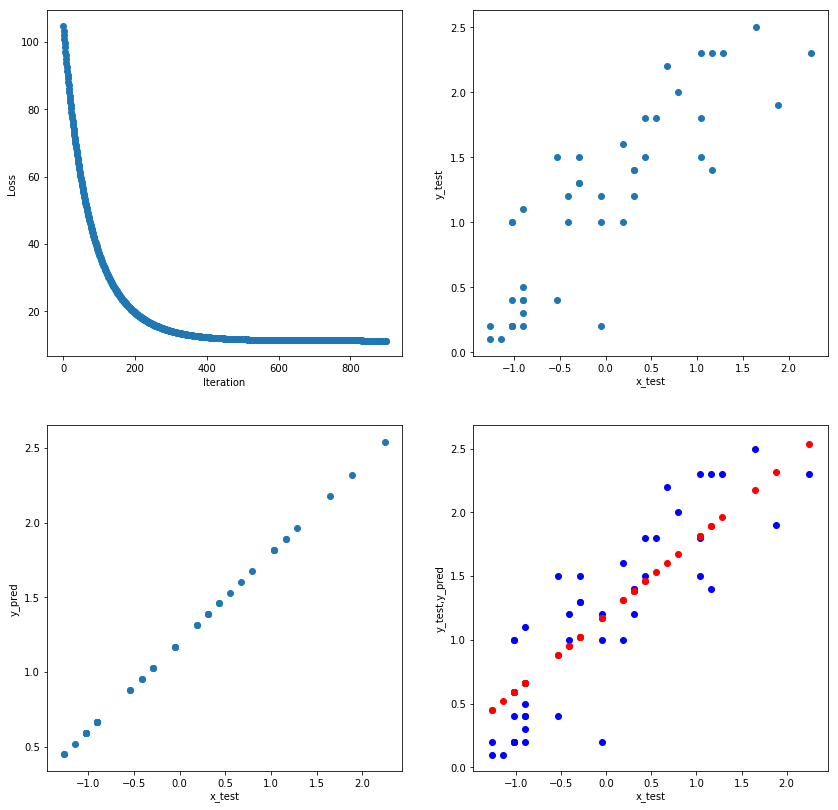

mean square error for y_predict and y_test is  0.13643441922207786


In [161]:
# Execute codes and functions for any linear regression
alpha=0.00005
result=linearRegression(alpha,x_train,y_train) 
if result!=False:
    teta,losses=result
    print('teta coeffiecients value is ',teta)
    primaryXTest=(x_test[:,1]).reshape(-1,1)
    plt.figure(figsize=(14,14))
    plt.subplot(2,2,1)
    plt.scatter(np.arange(len(losses)),losses)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.subplot(2,2,2)
    plt.scatter(primaryXTest,y_test)
    plt.xlabel('x_test')
    plt.ylabel('y_test')
    plt.subplot(2,2,3)
    y_pred=x_test@teta
    plt.scatter(primaryXTest,y_pred)
    plt.xlabel('x_test')
    plt.ylabel('y_pred')
    plt.subplot(2,2,4)
    plt.scatter(primaryXTest,y_test,c='blue')
    plt.scatter(primaryXTest,y_pred,c='red')
    plt.xlabel('x_test')
    plt.ylabel('y_test,y_pred')
    plt.show()
    print('mean square error for y_predict and y_test is ',meanSquareError(y_test,y_pred))
else:
    print('Error in convergence of loss function')
    



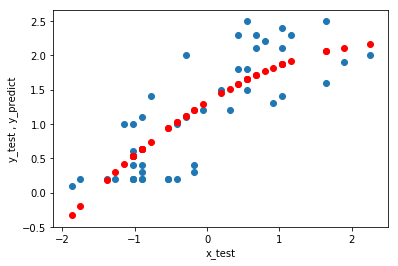

mean square error for y_predict and y_test is 0.2240596914675192


In [127]:
# Calculate y_predict and loss with sklearn linear-model package
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
metrics.mean_squared_error(y_test,lin.predict(x_test))
y_predict=lin.predict(x_test)
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],y_predict,c='red')
plt.xlabel('x_test')
plt.ylabel('y_test , y_predict')
plt.show()
print('mean square error for y_predict and y_test is',metrics.mean_squared_error(y_test,y_predict))